In [36]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
  
# load the data set
dataset = pd.read_csv('/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_features_106.csv')

encoder=LabelEncoder()
dataset["Subject Type/Class"]=encoder.fit_transform(dataset["Subject Type/Class"])

In [37]:
X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]

In [38]:

from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

classifier = GradientBoostingClassifier(n_estimators=4,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[31  8]
 [ 4 23]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        39
           1       0.74      0.85      0.79        27

    accuracy                           0.82        66
   macro avg       0.81      0.82      0.82        66
weighted avg       0.83      0.82      0.82        66

Accurecy:  0.8181818181818182


In [41]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import shap

explainer = shap.Explainer(classifier.predict, X_test)

shap_values = explainer( X_test)

In [43]:
features_names=list(dataset.iloc[0:0, 3:])
print(features_names)

['n0_gap_peak_ms', 'p1_gap_peak_ms', 'n1_gap_peak_ms', 'p2_gap_peak_ms', 'n2_gap_peak_ms', 'p3_gap_peak_ms', 'n0_nogap_peak_ms', 'p1_nogap_peak_ms', 'n1_nogap_peak_ms', 'p2_nogap_peak_ms', 'n2_nogap_peak_ms', 'p3_nogap_peak_ms', 'n0p1_interval_gap', 'n0n1_interval_gap', 'n0p2_interval_gap', 'n0n2_interval_gap', 'n0p3_interval_gap', 'p1n1_interval_gap', 'p1p2_interval_gap', 'p1n2_interval_gap', 'p1p3_interval_gap', 'n1p2_interval_gap', 'n1n2_interval_gap', 'n1p3_interval_gap', 'p2n2_interval_gap', 'p2p3_interval_gap', 'n2p3_interval_gap', 'n0p1_interval_nogap', 'n0n1_interval_nogap', 'n0p2_interval_nogap', 'n0n2_interval_nogap', 'n0p3_interval_nogap', 'p1n1_interval_nogap', 'p1p2_interval_nogap', 'p1n2_interval_nogap', 'p1p3_interval_nogap', 'n1p2_interval_nogap', 'n1n2_interval_nogap', 'n1p3_interval_nogap', 'p2n2_interval_nogap', 'p2p3_interval_nogap', 'n2p3_interval_nogap', 'n0_gap_peak_amp', 'p1_gap_peak_amp', 'n1_gap_peak_amp', 'p2_gap_peak_amp', 'n2_gap_peak_amp', 'p3_gap_peak_amp

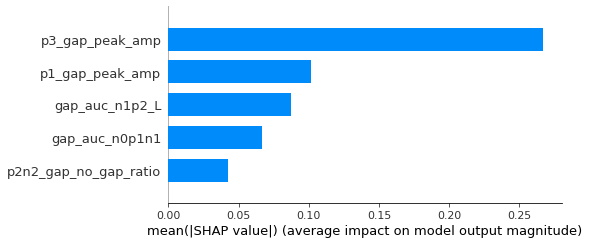

In [44]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=5,feature_names=features_names)

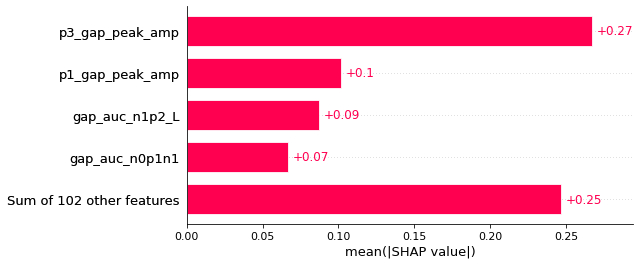

In [45]:
shap.plots.bar(shap_values,max_display=5)

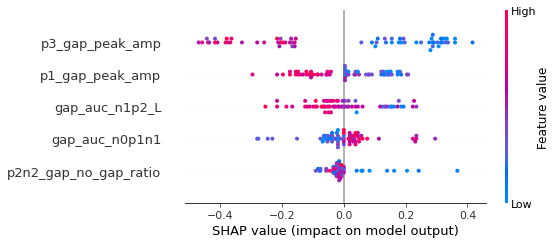

In [46]:
shap.summary_plot(shap_values,max_display=5,feature_names=features_names)

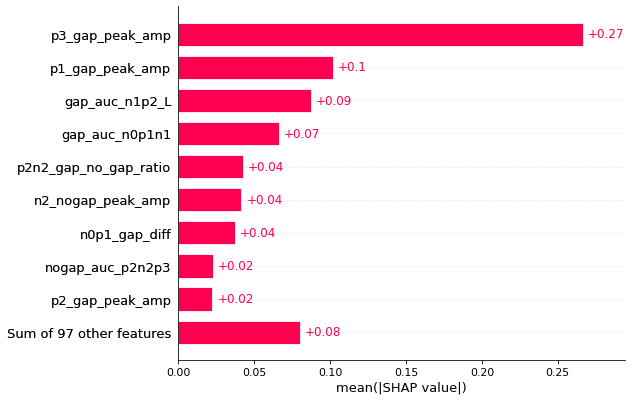

In [47]:
shap.plots.bar(shap_values)

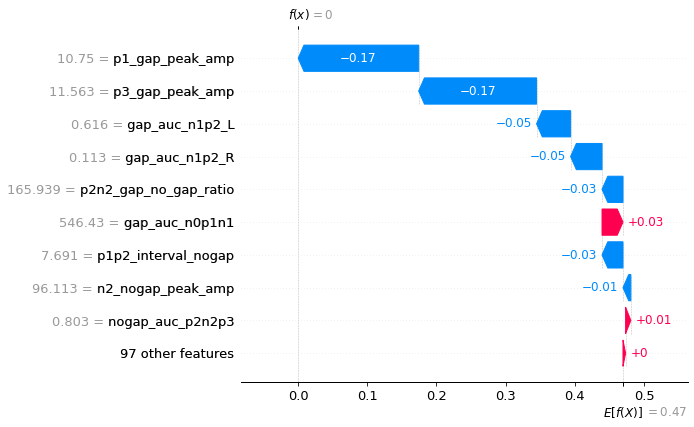

In [48]:
shap.plots.waterfall(shap_values[0])

In [49]:
shap.initjs()
shap.plots.force(shap_values[0],feature_names=features_names)

In [51]:
#explainer = shap.SamplingExplainer(KNN_class,X_test)
explainer = shap.KernelExplainer(classifier.predict_proba, X_train)
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

In [52]:
shap.initjs()
# Force plot
prediction = classifier.predict(X_test[start_index:end_index])[0]
print(f"The  predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names=features_names)

The  predicted: 0


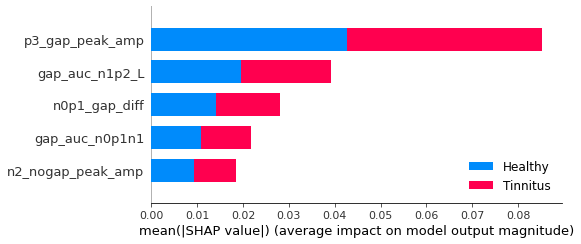

In [53]:
shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar",class_names=['Healthy','Tinnitus'],max_display=5,feature_names=features_names)